#INTRODUCTION
Here, I will be providing an analysis of the dataset:

```
student_performance.csv
```
to draw conclusions between a student's gender, ethnicity, level of education, lunchtime, and test preparation to their resulting scores in math, reading, and writing



#Objectives

***Data cleaning and organization**

Check and remove null and duplicated values, rename and reorganize data columns if necessary

***Exploration**

Analyze the unique value counts of each column to get an idea of the majority and minority data values

***Processing**

Create graphs to demonstrate the relationships between the aforementioned factors and the resulting test scores

and finally:

***Reporting**

Where I will draw a conclusion on the relation between the variables

In [ ]:
#Load required libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.dates import DateFormatter
from google.colab import files


import warnings
warnings.filterwarnings('ignore')

# t-test library package
from scipy.stats import ttest_ind
#check for association words package
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
uploads = files.upload()

In [ ]:
student_performance = pd.read_csv("StudentsPerformance.csv")
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Organization and Cleaning
The below docscript shows all necessary information regarding the data.

No cleaning or organization was necessary for this dataset.

In [ ]:
def overview():
  data = student_performance
  print("The first five rows of the dataset are:\n", data.head())
  print("\n")
  print("The Row x Column shape is:\n",data.shape)
  print("\n")
  print("The data types are:\n",data.dtypes)
  print("\n")
  print("The amount of null values in each column are:\n",data.isnull().sum())
  print("\n")
  print("The amount of duplicates in each column are:\n",data.duplicated().sum())
  print("\n")
  print("The summary of all test scores is:\n",data.describe())
  return data

df = overview()


The first five rows of the dataset are:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


The Row x Column shape is:
 (1000, 8)


The data types are:
 gender                         object
race/ethnicity   

#Exploration phase
Tthe most common student is that of ethnicity C whilst the minority is of ethnicity A.

For the levels of education, most participants have an associates degree or some college experience whilst the minority have completed a master's degree.

The majority of participants have a standard lunchtime as opposed to a free or reduced lunchtime.

The majority also have not completed a test preparation course.

Both figures show a 2/3 ratio of the majority


female    518
male      482
Name: gender, dtype: int64


Axes(0.125,0.11;0.775x0.77)


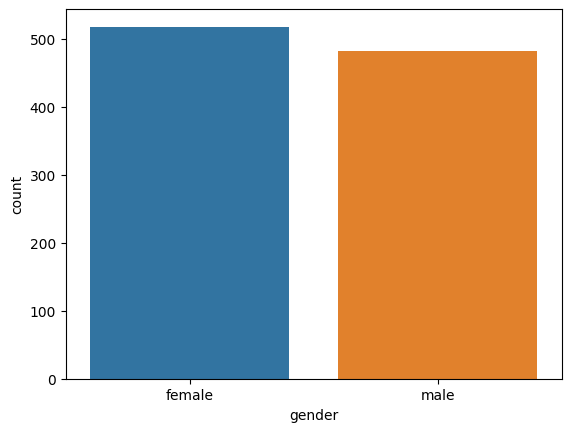

In [ ]:
print(student_performance["gender"].value_counts())
print("\n")
print(sns.countplot(data = student_performance, x = "gender", order = student_performance["gender"].value_counts().index ))

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


Axes(0.125,0.11;0.775x0.77)


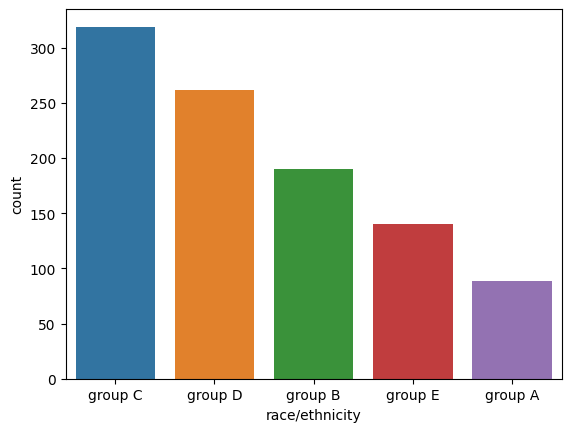

In [ ]:
print(student_performance["race/ethnicity"].value_counts())
print("\n")
print(sns.countplot(data = student_performance, x = "race/ethnicity", order = student_performance["race/ethnicity"].value_counts().index ))

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


Axes(0.125,0.11;0.775x0.77)


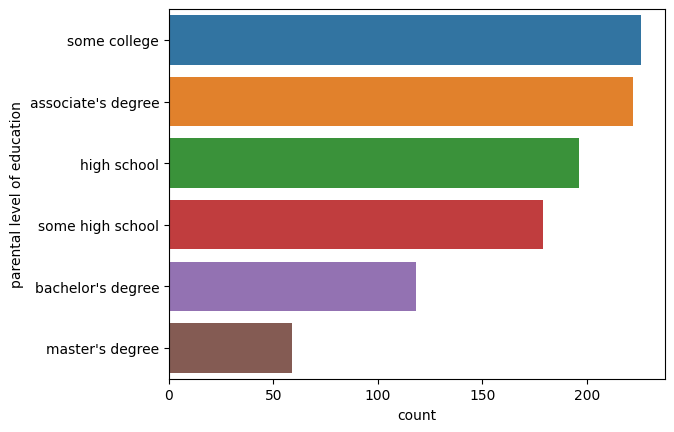

In [ ]:
print(student_performance["parental level of education"].value_counts())
print("\n")
print(sns.countplot(data = student_performance, y = "parental level of education", order = student_performance["parental level of education"].value_counts().index ))

standard        645
free/reduced    355
Name: lunch, dtype: int64


Axes(0.125,0.11;0.775x0.77)


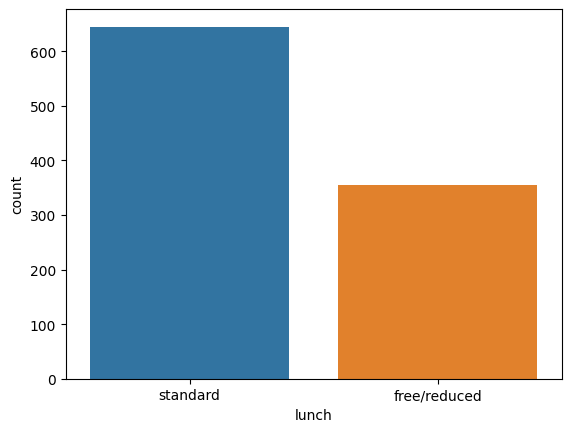

In [ ]:
print(student_performance["lunch"].value_counts())
print("\n")
print(sns.countplot(data = student_performance, x = "lunch", order = student_performance["lunch"].value_counts().index ))

none         642
completed    358
Name: test preparation course, dtype: int64


Axes(0.125,0.11;0.775x0.77)


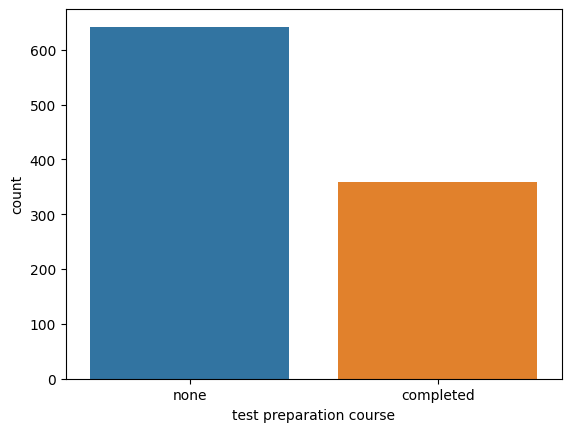

In [ ]:
print(student_performance["test preparation course"].value_counts())
print("\n")
print(sns.countplot(data = student_performance, x = "test preparation course", order = student_performance["test preparation course"].value_counts().index ))

#Processing
Here I will show distribution subplots between the three test scores vs gender, race, education, lunchtime, and test preparation.

We will be using a function to create the distribution graph.

In [ ]:
def dist_plot(dataset, variable):
  '''
  arguments:
    dataset = the dataset in this scenario, student_performance
    variable = the comparison variable to the test scores

  returns:
  multiple seaborn subplots
  '''
  df = student_performance
  pp = sns.pairplot(data = dataset, hue = variable)
  pp.fig.suptitle("Distribution between test scores and {}".format(variable),fontsize = 20)
  pp.fig.subplots_adjust(top = 0.9)
  return pp


The amount of participants for each gender are:
 female    518
male      482
Name: gender, dtype: int64




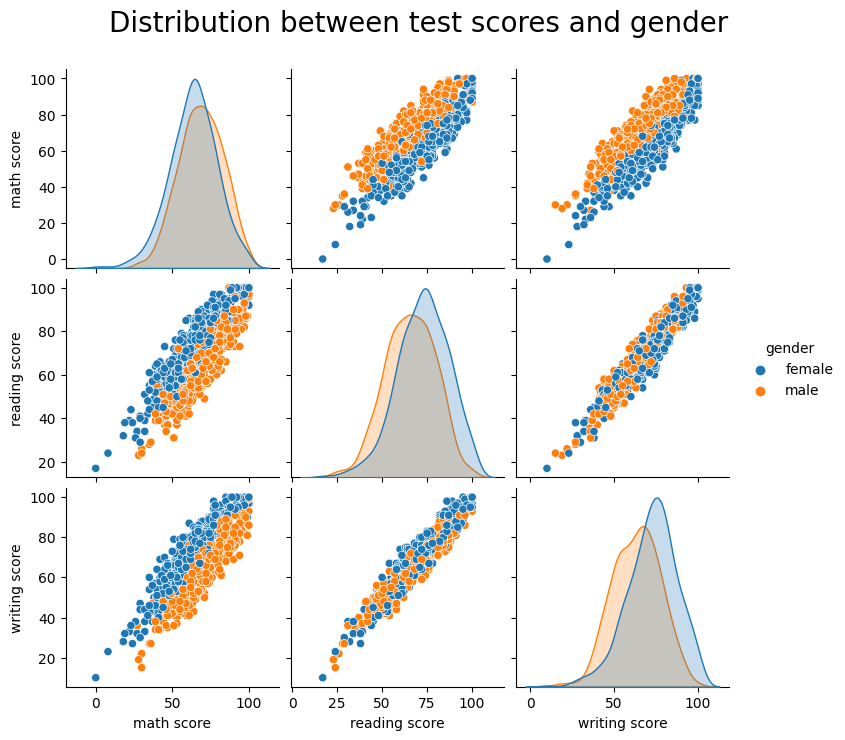

In [ ]:
print("The amount of participants for each gender are:\n",df["gender"].value_counts())
print("\n")
print(dist_plot(df,'gender'))

The amount of participants for each race are:
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64




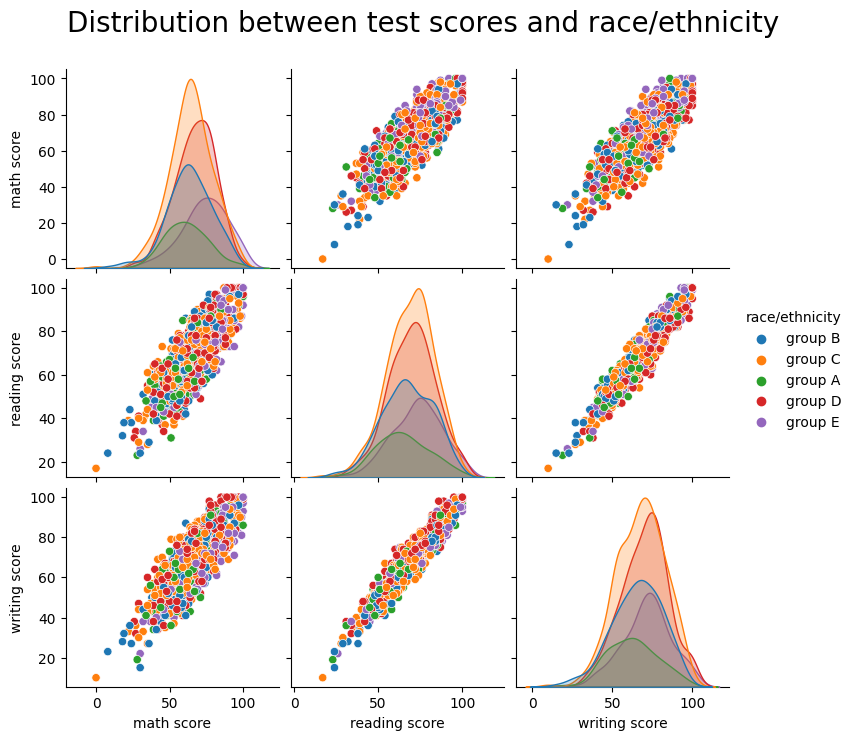

In [ ]:
print("The amount of participants for each race are:\n", df["race/ethnicity"].value_counts())
print("\n")
print(dist_plot(df,'race/ethnicity'))

The distribution of education level is:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64




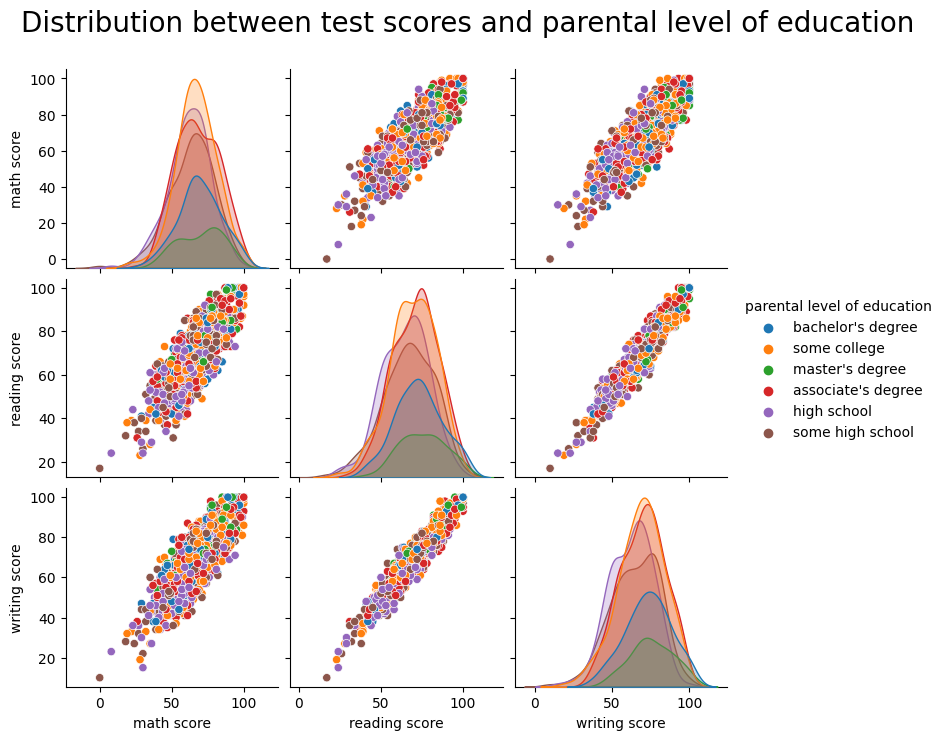

In [ ]:
print("The distribution of education level is:\n",df["parental level of education"].value_counts())
print("\n")
print(dist_plot(df,'parental level of education'))

The distribution of lunch times are:
 standard        645
free/reduced    355
Name: lunch, dtype: int64




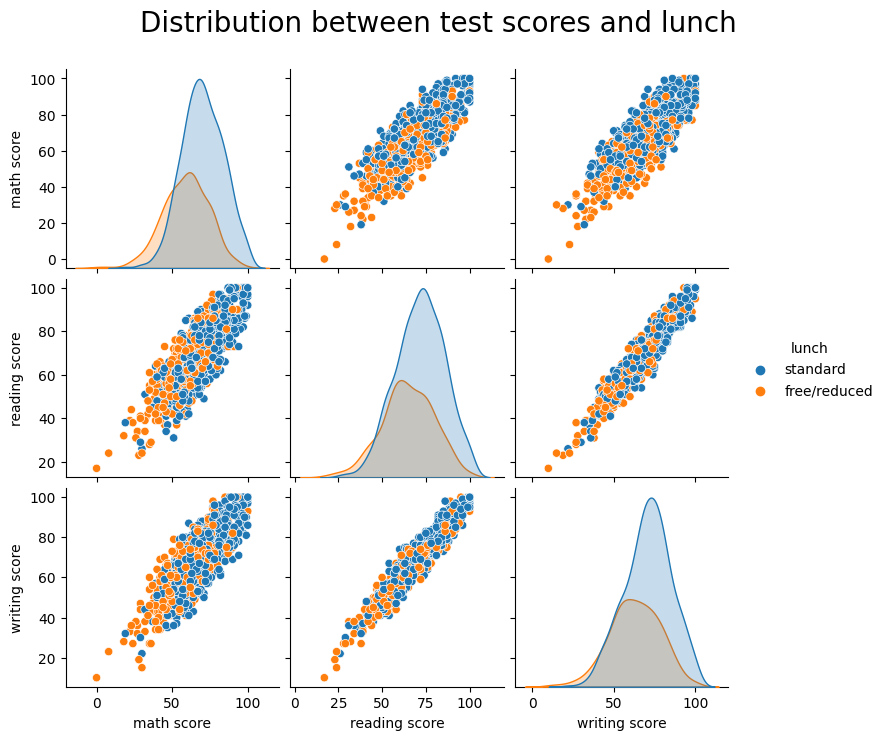

In [ ]:
print("The distribution of lunch times are:\n",df["lunch"].value_counts())
print("\n")
print(dist_plot(df,'lunch'))

The distribution of completing a test prep course is:
 none         642
completed    358
Name: test preparation course, dtype: int64




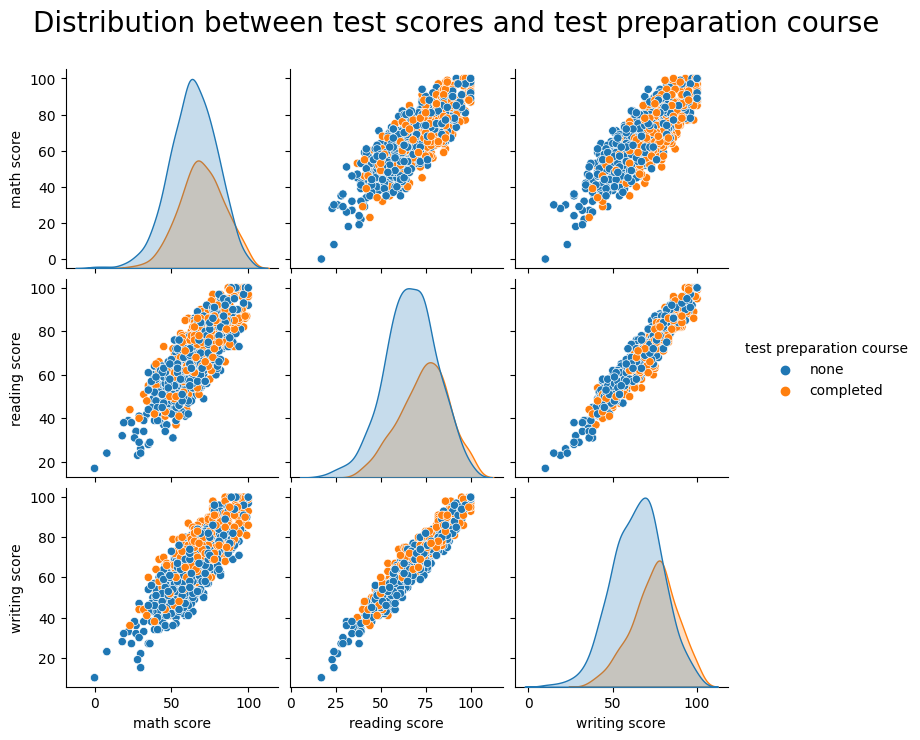

In [ ]:
print("The distribution of completing a test prep course is:\n", df["test preparation course"].value_counts())
print("\n")
print(dist_plot(df,'test preparation course'))

#What do these graphs tell us?
We form our conclusions mainly on the diagonal graphs that show the categorical relations. From which we find:
* Females outrank men in all 3 tests
* Group C dominates the test rankings, Group A has the lowest scores
* *Note*: Group C has the greatest population and Group A has the fewest members
* Some college dominates the scores whilst those with Master's degrees have the lowest scores (in terms of parental education)
* *Note*: Like ethnicity, some college is the most numerous population and Master's is the fewest
* A standard lunchtime has an overwhelmingly higher score than those with free/reduced lunchtime
* Those who have NOT completed a test prep course overwhemingly outrank those who have in test scores

The distribution of test scores appears to be more reflective of the population of each respective group. It's possible that a higher population of participants means that there is a higher chance of individuals who will score overwhemingly higher.



#ANOVA correlation testing
To proceed, we will be using 1-way ANOVA correlation calculations to find a numerical value to represent the correlation between one variable and the resulting test scores.

A null hypothesis will mean the variable and test scores are independent, whilst the otherwise alternate hypothesis means there exists some correlation. i.e a 'p' value < 0.05 indicates a correlation, whilst a 'p' > 0.05 indicates independence

In [ ]:
# StatsModels don't accept spaces so we'll modify each column.
df.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score']

def anova_test(data, variable):
    '''
    Arguments: data (DataFrame), variable: Categorical columns that you want to do 1-way ANOVA test with

    Returns: Nothing
    '''
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is".format(x[i],variable),table.loc[variable,'PR(>F)'])
        print("The existence of a correlation between {} and {} is".format(x[i],variable), table.loc[variable,'PR(>F)'] < 0.05)
        print("\n")

print(anova_test(df, 'gender'))
print(anova_test(df, 'race'))
print(anova_test(df, 'parental_edu'))
print(anova_test(df, 'lunch'))
print(anova_test(df, 'test_prep_course'))

P-value for 1-way ANOVA test between math_score and gender is 9.120185549333453e-08
The existence of a correlation between math_score and gender is True


P-value for 1-way ANOVA test between reading_score and gender is 4.680538743934009e-15
The existence of a correlation between reading_score and gender is True


P-value for 1-way ANOVA test between writing_score and gender is 2.0198777068682407e-22
The existence of a correlation between writing_score and gender is True


None
P-value for 1-way ANOVA test between math_score and race is 1.3732194030370688e-11
The existence of a correlation between math_score and race is True


P-value for 1-way ANOVA test between reading_score and race is 0.0001780089103235852
The existence of a correlation between reading_score and race is True


P-value for 1-way ANOVA test between writing_score and race is 1.0979189070066777e-05
The existence of a correlation between writing_score and race is True


None
P-value for 1-way ANOVA test between math_sco

#Insights

We find that there exists a correlation between all variables and the resulting students' test scores.

However, there is an outlier that should be addressed, the parental level of education. Whilst every other factor pertains to the student themself, it's hard to see why the education level of their parents would have such an influence.

So we will proceed to examine this specific variable

<Axes: xlabel='parental_edu', ylabel='count'>

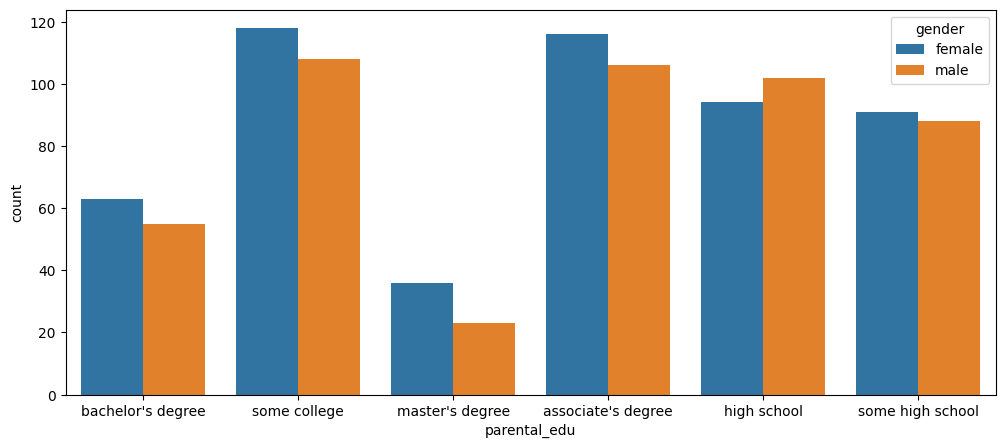

In [ ]:
plt.figure(figsize=(12,5))

sns.countplot(data = df, x = 'parental_edu', hue = 'gender')

* The number of students whose parents have completed a bachelor's or master's degree are both very low compared to the rest.

In [ ]:
print("The percentage of high score students whose parents have a master's degree is: %", (df[(df['parental_edu'] == "master's degree") & (df["math_score"] >= 70) & (df["reading_score"] >= 70) & (df["writing_score"] >= 70)].value_counts().sum())/(df[(df['parental_edu'] == "master's degree")] .value_counts().sum())*100)

The percentage of high score students whose parents have a master's degree is: % 50.847457627118644


In [ ]:
print("The percentage of high score students whose parents have a bachelor's degree is: %", (df[(df['parental_edu'] == "bachelor's degree") & (df["math_score"] >= 70) & (df["reading_score"] >= 70) & (df["writing_score"] >= 70)].value_counts().sum())/(df[(df['parental_edu'] == "bachelor's degree")].value_counts().sum())*100)

The percentage of high score students whose parents have a bachelor's degree is: % 39.83050847457627


In [ ]:
print("The percentage of high score students whose parents have a neither a bachelor's or master's degree is: %", (df[(df['parental_edu'] != "master's degree") & (df['parental_edu'] != "bachelors's degree") & (df["math_score"] >= 70) & (df["reading_score"] >= 70) & (df["writing_score"] >= 70)].value_counts().sum())/(df[(df['parental_edu'] != "master's degree") & (df['parental_edu'] != "bachelors's degree")].value_counts().sum())*100)

The percentage of high score students whose parents have a neither a bachelor's or master's degree is: % 31.243358129649305


#Conclusion

Aha! So the answer to my question on whether or not a higher parental education level can affect the student's score seems to be True.

Whilst this may not exactly reflect the education level of the students themselves, it is clear that a higher percentage of students who have highly educated parents will also score higher on tests themselves.

#Final remarks

In this analysis, we find that there exists clear correlation between all listed factors, in the dataset, and the resulting 3 test scores of each student. These factors being their: gender, race, parental education, lunchtime, and test preparation.

We find higher distributions exist in higher populated samples, but our ANOVA correlation numbers still tell us that clear correlations exist between all factors.